# 2022 베이징 올림픽 메달 랭킹 



Fox 스포츠의 '2022년 베이징 올림픽 메달 랭킹' 데이터들을 크롤링 (Crawling)을 하여 메달 랭킹 분석을 하였습니다. 

- 사이트 이름 : Fox 스포츠 (Fox Sports) 

- 사이트 링크 : https://www.foxsports.com/winter-olympics/standings

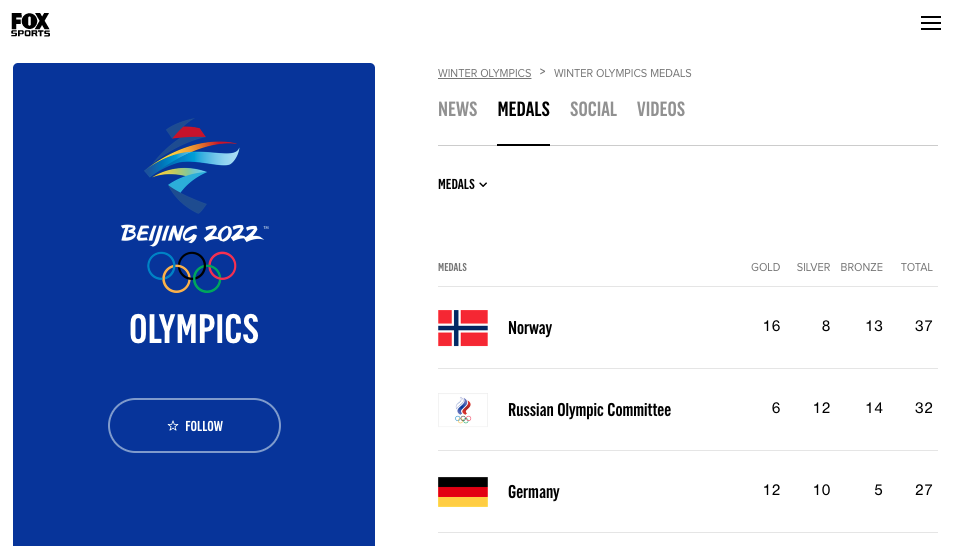

In [1]:
import requests 
import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup 
import re
import pandas as pd 
import re
import pandas as pd 
import seaborn as sns 

#request.get()으로 url 정보 요청하기 

headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36"}
url = "https://www.foxsports.com/winter-olympics/standings"

r = requests.get(url,headers=headers)

soup = BeautifulSoup(r.text, 'lxml')

In [2]:
# 저장소 만들기 
first = []
second = []
third = []
fourth = []
last = []

# 국가, 나라, 금메달, 음메달, 동메달까지 크롤링하기 
country = soup.select('#__layout > div > div.fscom-main-content > div.entity-container > div.entity-body > div.layout-content-container > div > div > div:nth-of-type(2) > div > div > div > table > tbody > tr > td.cell-entity.fs-18.lh-1pt67 > div > span')
for m in country:
  m = m.get_text().strip()
  first.append(m)

gold = soup.select("#__layout > div > div.fscom-main-content > div.entity-container > div.entity-body > div.layout-content-container > div > div > div:nth-of-type(2) > div > div > div > table > tbody > tr > td:nth-of-type(2)")
for j in gold:
  j = j.get_text().strip()
  second.append(j)

silver = soup.select('#__layout > div > div.fscom-main-content > div.entity-container > div.entity-body > div.layout-content-container > div > div > div:nth-of-type(2) > div > div > div > table > tbody > tr > td:nth-of-type(3)')
for k in silver:
  k = k.get_text().strip()
  third.append(k)

bronze = soup.select('#__layout > div > div.fscom-main-content > div.entity-container > div.entity-body > div.layout-content-container > div > div > div:nth-of-type(2) > div > div > div > table > tbody > tr > td:nth-of-type(4)')
for p in bronze:
  p = p.get_text().strip()
  fourth.append(p)

total = soup.select('#__layout > div > div.fscom-main-content > div.entity-container > div.entity-body > div.layout-content-container > div > div > div:nth-of-type(2) > div > div > div > table > tbody > tr > td:nth-of-type(5)')
for i in total:
  i = i.get_text().strip()
  last.append(i)

# DataFrame으로 테이블 만들기 

df = pd.DataFrame({
    "Country":first,
    "Gold":second,
    "Silver": third,
    "Bronze":fourth,
    "Total":last

})

df.head(4)

,Country,Gold,Silver,Bronze,Total
0,Norway,16,8,13,37
1,Russian Olympic Committee,6,12,14,32
2,Germany,12,10,5,27
3,Canada,4,8,14,26


In [ ]:
# "2022_Beijing_Winter_Olympics_Medal.csv"으로 저장 
df.to_csv("2022_Beijing_Winter_Olympics_Medal.csv", index = False)
print("save")

save


In [3]:
# 한국 찾아보기 
df.loc[df.Country =="South Korea"]

,Country,Gold,Silver,Bronze,Total
13,South Korea,2,5,2,9


In [4]:
# 데이터들이 다 문자열로 쓰여있음 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  208 non-null    object
 1   Gold     208 non-null    object
 2   Silver   208 non-null    object
 3   Bronze   208 non-null    object
 4   Total    208 non-null    object
dtypes: object(5)
memory usage: 8.2+ KB


In [14]:
# Gold (금메달), Silver(은메달), Bronze(동메달) 문자열을 숫자형으로 바꾸기 
df['Gold'] = pd.to_numeric(df['Gold'])
df['Silver'] = pd.to_numeric(df['Silver'])
df['Bronze'] = pd.to_numeric(df['Bronze'])
df['Total'] = pd.to_numeric(df['Total'])

In [6]:
# 다시 체크 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  208 non-null    object
 1   Gold     208 non-null    int64 
 2   Silver   208 non-null    int64 
 3   Bronze   208 non-null    int64 
 4   Total    208 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.2+ KB


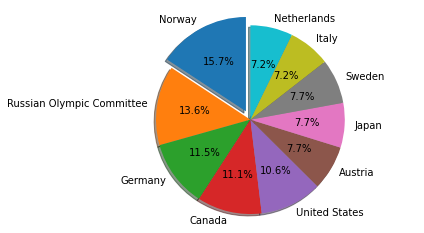

In [7]:
import numpy as np

labels=df["Country"][:10] #10위 안에 드는 나라들 가져오기 
sizes=df["Total"][:10] # 총 열에서 10개 항목을 가져오기
explode = np.zeros(len(sizes)) #0으로 가득 찬 numpy 배열 만들기
explode[sizes.argmax()] = 0.1 #최대 값에 0.1을 할당

ig1,ax1=plt.subplots() #그림 크기인 그림 및 하위 그림 세트를 작성
ax1.pie(sizes, #파이 차트 만들기 
explode=explode, #노르웨이에 explode 기능 추가 
labels=labels, #레이블 추가 
autopct='%1.1f%%', #파이 안의 숫자 형성
shadow=True, #그림자 추가  
startangle=90) #파이에 시작 각도 추가 
ax1.axis('equal') #파이를 동그라미게 만들기
plt.show() #차트 보기 

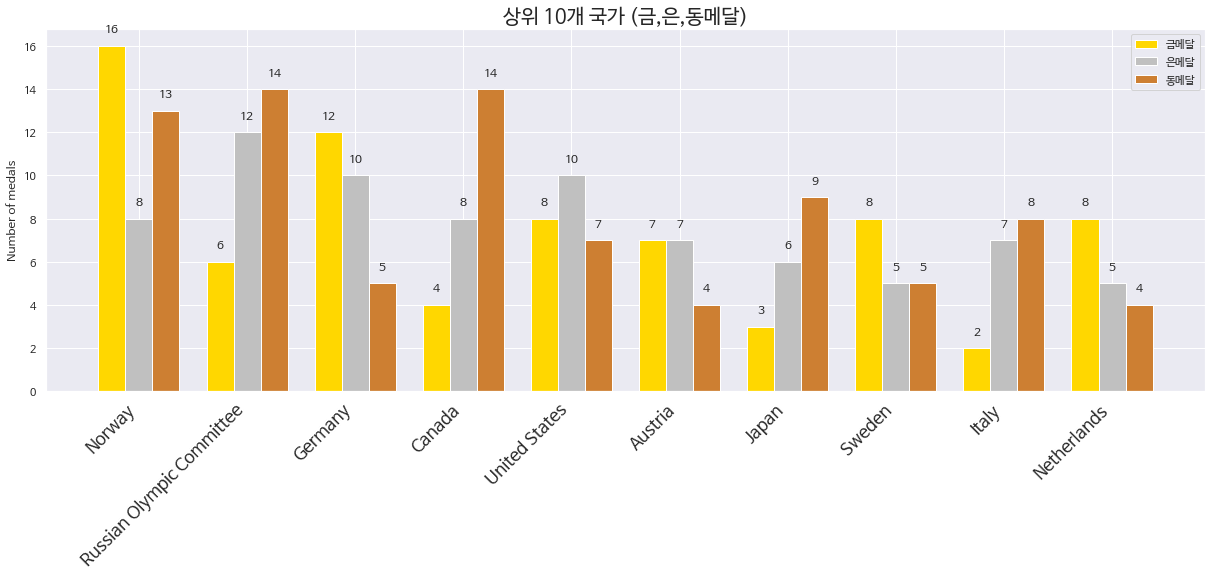

In [13]:
labels=df["Country"][:10] # 컬럼 10 국가 가져오기 
gold_medals=df["Gold"][:10] #컬럼 10위 국가의 금메달 함계 가져오기 
silver_medals=df["Silver"][:10]#컬럼 10위 국가의 은메달 함계 가져오기 
bronze_medals=df["Bronze"][:10]#컬럼 10위 국가의 동메달 함계 가져오기 


x = np.arange(len(labels))  # 라벨 길이를 숫자 배열로 변환
width = 0.25  # 막대의 너비

sns.set(font="NanumBarunGothic", rc={"axes.unicode_minus":False}, style='darkgrid') # 한국어 설정 

fig,ax= plt.subplots(figsize=(17,6))  #그림 크기인 그림 및 하위 그림 세트를 작성
gold_bars=ax.bar(x-width,gold_medals,width,label='금메달',color="#FFD700") #각 범주에 대한 막대 생성
silver_bars=ax.bar(x,silver_medals,width,label='은메달',color="#C0C0C0")#너비로 간격 두기
bronze_bars=ax.bar(x+width,bronze_medals,width,label='동메달',color="#CD7F32")#맞춤 색상

ax.set_ylabel("Number of medals") #y axis 제목 
ax.set_title("상위 10개 국가 (금,은,동메달)", fontsize = 20) # 차트 제목 
ax.set_xticks(x) #차트의 눈금을 작성된 numpy 배열로 설정
ax.set_xticklabels(labels) #레이블 설정
ax.legend() #범례 만들기

ax.bar_label(gold_bars,padding=10)# 텍스트와 막대 사이에 5의 패딩이 있는 각 막대에 레이블 추가
ax.bar_label(silver_bars,padding=10)
ax.bar_label(bronze_bars,padding=10)


fig.tight_layout() #그림 영역에 들어맞도록 매개변수를 조정함
plt.xticks( #국가 레이블 만듬 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show() 


# 노르웨이가 메달을 많이 차지했음 